In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.core import datetools
import pandas_datareader as pdr
import datetime 
import fix_yahoo_finance
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib import style
style.use('ggplot')


In [5]:
start=datetime.datetime(2008, 1, 1)
end=datetime.datetime(2017, 12, 31)

In [6]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'INTC', 'GOOG']
all_data = get(tickers, start, end)

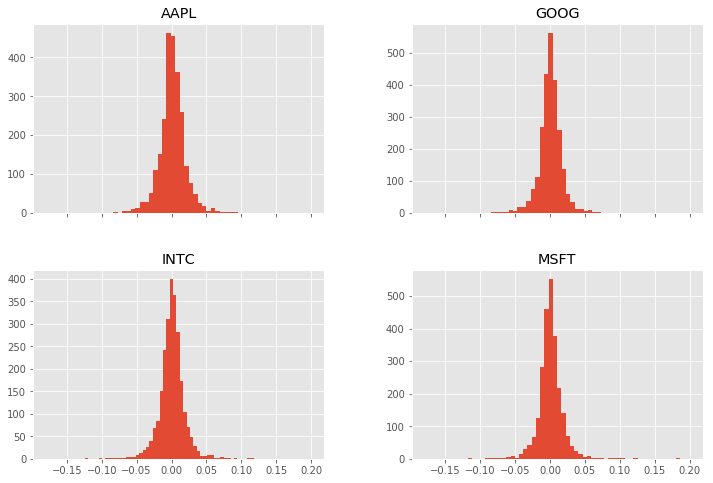

In [7]:
# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


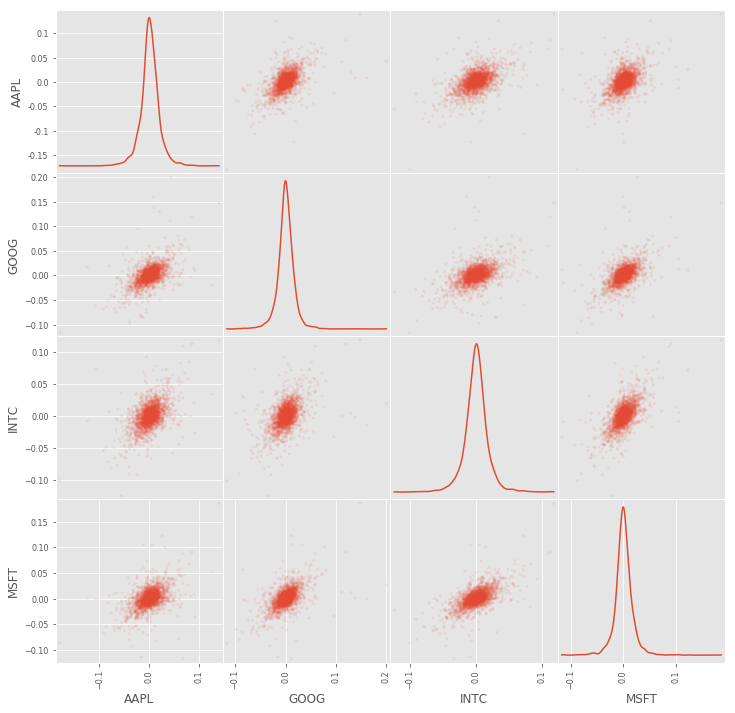

In [8]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

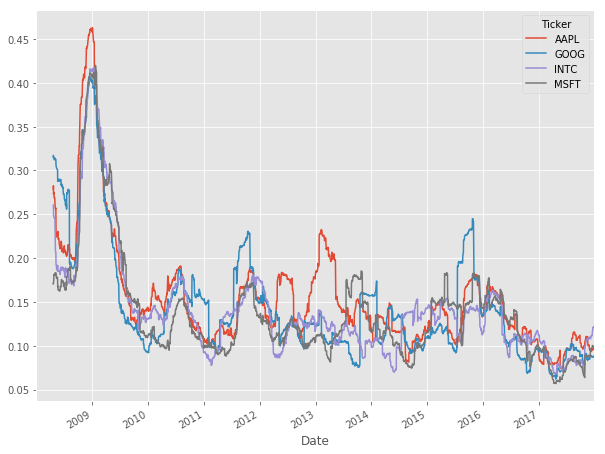

In [11]:

# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [12]:
aapl = pdr.get_data_yahoo('AAPL', start,end)

In [13]:
aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,74.716151,75.377659,73.996263,74.707181,70.488712,1.112567e+08
std,41.991464,42.241037,41.733619,42.002530,41.952041,8.990299e+07
min,11.341429,11.714286,11.171429,11.171429,10.014443,1.147590e+07
25%,36.679284,37.081785,36.297501,36.658572,32.861967,4.635788e+07
50%,74.003570,74.594284,73.212143,74.131428,67.778526,8.874040e+07
75%,107.869997,108.865002,106.789999,107.895000,103.767807,1.480068e+08
max,175.110001,177.199997,174.860001,176.419998,176.419998,8.432424e+08


In [14]:
aapl.to_csv('aapl.csv')
df = pd.read_csv('aapl.csv', header=0, index_col='Date', parse_dates=True)

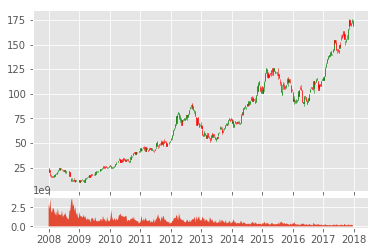

In [15]:

df = pd.read_csv('aapl.csv', parse_dates = True, index_col = 0)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

df_ohlc = df['Adj Close'].resample('10D').ohlc() # we could do sum, mean etd
# Note that some stocks may have splits. This requires careful treatment
df_volume = df['Volume'].resample('10D').sum()
#print(df_ohlc.head())

df_ohlc.reset_index(inplace = True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
#print (df_ohlc.head())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)

plt.show()

In [16]:
msft = pdr.get_data_yahoo('MSFT', start,end)

In [17]:
msft.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,38.119365,38.464150,37.775576,38.134516,34.545251,4.898434e+07
std,15.516733,15.572253,15.458278,15.528997,16.777730,2.902340e+07
min,15.200000,15.620000,14.870000,15.150000,12.110738,7.425600e+06
25%,26.760000,27.000000,26.480000,26.770000,22.008518,2.881828e+07
50%,31.100000,31.440001,30.905000,31.185001,26.668096,4.347130e+07
75%,46.937499,47.447501,46.537501,47.000000,44.009321,6.069130e+07
max,87.120003,87.500000,86.230003,86.849998,86.849998,3.193179e+08


In [18]:
msft.to_csv('msft.csv')
df = pd.read_csv('msft.csv', header=0, index_col='Date', parse_dates=True)

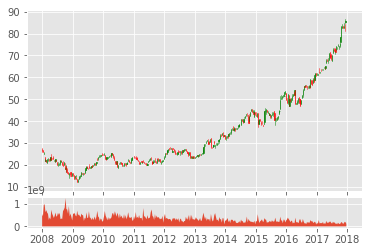

In [19]:

df = pd.read_csv('msft.csv', parse_dates = True, index_col = 0)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

df_ohlc = df['Adj Close'].resample('10D').ohlc() # we could do sum, mean etd
# Note that some stocks may have splits. This requires careful treatment
df_volume = df['Volume'].resample('10D').sum()
#print(df_ohlc.head())

df_ohlc.reset_index(inplace = True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
#print (df_ohlc.head())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)

plt.show()

In [20]:
goog = pdr.get_data_yahoo('GOOG', start,end)

In [21]:
goog.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,458.113641,461.910874,453.936474,458.012074,458.012074,4.974262e+06
std,233.619327,234.770555,232.393890,233.731540,233.731540,4.382626e+06
min,130.406830,133.814667,122.850975,127.888214,127.888214,7.900000e+03
25%,270.659614,272.986969,266.895348,269.676018,269.676018,1.837300e+06
50%,368.808762,373.796311,366.305039,369.909104,369.909104,3.943500e+06
75%,600.001922,603.056442,594.365250,597.951660,597.951660,6.239100e+06
max,1075.199951,1078.489990,1063.550049,1077.140015,1077.140015,4.687730e+07


In [22]:
goog.to_csv('goog.csv')
df = pd.read_csv('goog.csv', header=0, index_col='Date', parse_dates=True)

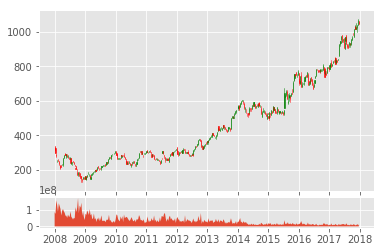

In [23]:

df = pd.read_csv('goog.csv', parse_dates = True, index_col = 0)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

df_ohlc = df['Adj Close'].resample('10D').ohlc() # we could do sum, mean etd
# Note that some stocks may have splits. This requires careful treatment
df_volume = df['Volume'].resample('10D').sum()
#print(df_ohlc.head())

df_ohlc.reset_index(inplace = True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
#print (df_ohlc.head())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)

plt.show()

In [24]:
intc = pdr.get_data_yahoo('INTC', start,end)

In [25]:
intc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,26.134817,26.401521,25.875520,26.149150,22.933213,4.543908e+07
std,7.019037,7.029364,7.007085,7.031593,8.188137,2.683053e+07
min,12.170000,12.630000,12.050000,12.080000,9.102352,5.893800e+06
25%,21.002500,21.200001,20.770000,20.959999,16.497242,2.540332e+07
50%,24.214999,24.495000,24.015000,24.250000,20.864363,3.924375e+07
75%,32.279999,32.697501,32.017499,32.349998,30.295467,5.878245e+07
max,47.540001,47.639999,46.660000,47.560001,47.560001,3.093476e+08


In [26]:
intc.to_csv('intc.csv')
df = pd.read_csv('intc.csv', header=0, index_col='Date', parse_dates=True)

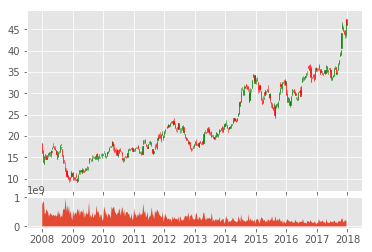

In [27]:
df = pd.read_csv('intc.csv', parse_dates = True, index_col = 0)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

df_ohlc = df['Adj Close'].resample('10D').ohlc() # we could do sum, mean etd
# Note that some stocks may have splits. This requires careful treatment
df_volume = df['Volume'].resample('10D').sum()
#print(df_ohlc.head())

df_ohlc.reset_index(inplace = True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
#print (df_ohlc.head())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)

plt.show()